In [2]:
import perceval as pcvl
import numpy as np  

# Create the circuit

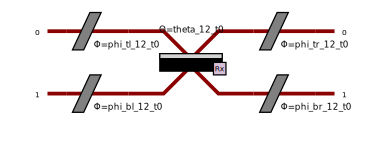

In [26]:
def U_ij_t(i : int , j : int, t : int = 0):
    """Returns the unitary acting on mode i and j."""
    return (pcvl.Circuit(2, name=f"U_{i}{j}_t{t}")
            .add(0, pcvl.PS(phi=pcvl.P(f"phi_tl_{i}{j}_t{t}")))
            .add(1, pcvl.PS(phi=pcvl.P(f"phi_bl_{i}{j}_t{t}")))
            .add(0, pcvl.BS(theta=pcvl.P(f'theta_{i}{j}_t{t}')))
            .add(0, pcvl.PS(phi=pcvl.P(f"phi_tr_{i}{j}_t{t}")))
            .add(1, pcvl.PS(phi=pcvl.P(f"phi_br_{i}{j}_t{t}"))))

U_12 = U_ij_t(1, 2)
pcvl.pdisplay(U_12)

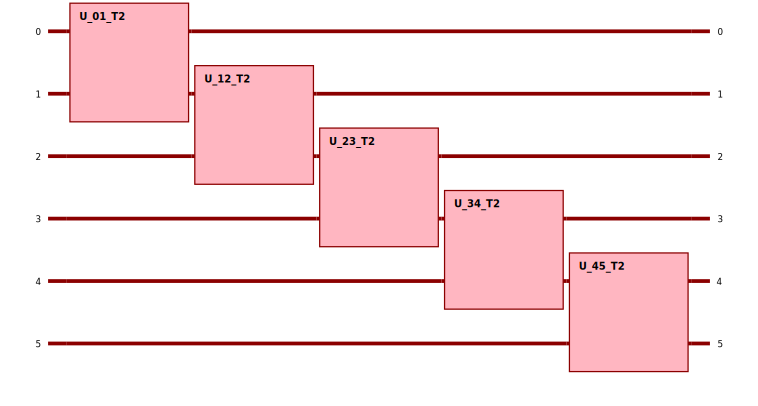

In [61]:
def full_layer(n : int, t : int = 0, _overlapping : bool = False):
    layer = pcvl.Circuit(n)
    if _overlapping:
        for i in range(n-1):
            layer = layer.add(i, U_ij_t(i, (i+1), t))
    else:
        if n % 2 != 0:
            print("WARNING: The number is not even and _overlapping is False => the last mode will be ignored.")
        for i in range((n)//2):
            layer = layer.add(2*i, U_ij_t(i, i+1, t))
    return layer

layer = full_layer(6, 2, True)
pcvl.pdisplay(layer)

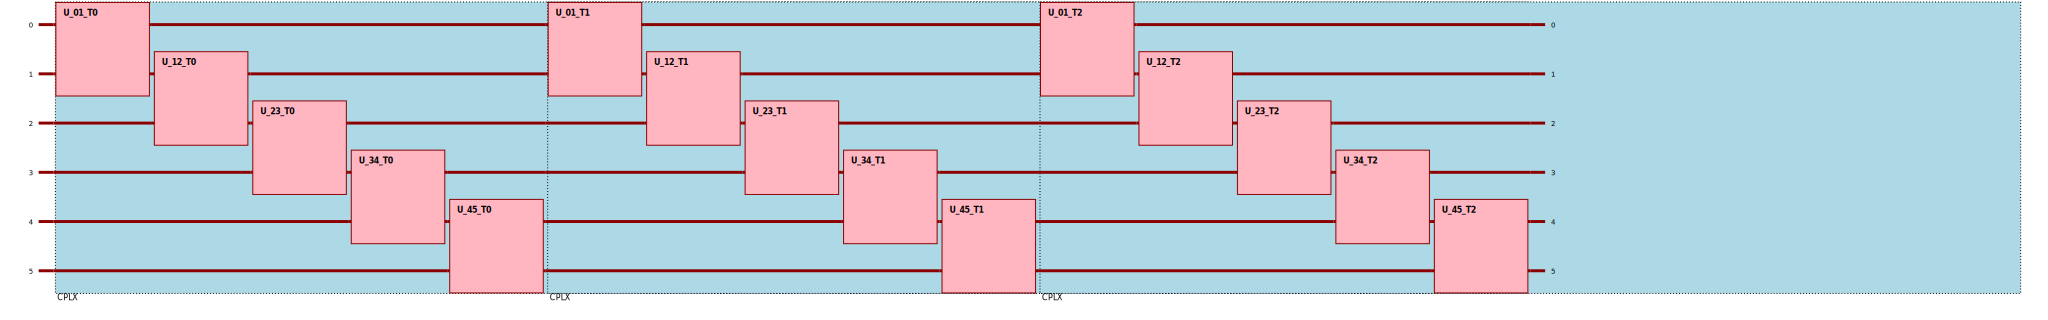

In [72]:
def create_circuit(n, t, _overlapping=False):
    main_circuit = pcvl.Circuit(n)
    for t in range(t):
        main_circuit = main_circuit.add(0, full_layer(n, t, _overlapping), merge=False)
    return main_circuit

# Example usage:
n = 6  # Number of modes
t = 3  # Number of times to repeat the layers
circuit = create_circuit(n, t, _overlapping=True)
pcvl.pdisplay(circuit, recursive=True)


# Set the parameters to the array

In [67]:
# I have 5 parameters to set per circuit layer (theta, phi_tl, phi_bl, phi_tr, phi_br)
# Let't generate a random matrix: (t, 5)

import numpy as np

def generate_parameter_matrix(t, num_parameters):
    # Randomly generate a matrix of size t x num_parameters
    # This can be adjusted to generate parameters based on specific criteria
    return np.random.rand(t, num_parameters)*2*np.pi # Random dataset of angles

t = 10  # Number of timesteps
num_parameters = 5  # Number of parameters per layer
parameter_matrix = generate_parameter_matrix(t, num_parameters)
parameter_matrix

matrix = np.array([[1,2], [3,4]])
print(matrix)
matrix.flatten()

[[1 2]
 [3 4]]


array([1, 2, 3, 4])

(3, 25)
[Parameter(name='phi_tl_01_t0', value=5.693147583162657, min_v=0.0, max_v=6.283185307179586), Parameter(name='phi_bl_01_t0', value=0.5933944895492473, min_v=0.0, max_v=6.283185307179586), Parameter(name='theta_01_t0', value=5.489029622470705, min_v=0.0, max_v=12.566370614359172), Parameter(name='phi_tr_01_t0', value=0.8012000678209678, min_v=0.0, max_v=6.283185307179586), Parameter(name='phi_br_01_t0', value=5.883876807367663, min_v=0.0, max_v=6.283185307179586), Parameter(name='phi_tl_12_t0', value=0.33815401508004866, min_v=0.0, max_v=6.283185307179586), Parameter(name='phi_bl_12_t0', value=3.0377998760955105, min_v=0.0, max_v=6.283185307179586), Parameter(name='theta_12_t0', value=1.551119411133981, min_v=0.0, max_v=12.566370614359172), Parameter(name='phi_tr_12_t0', value=2.832191776118274, min_v=0.0, max_v=6.283185307179586), Parameter(name='phi_br_12_t0', value=1.1960216012848612, min_v=0.0, max_v=6.283185307179586), Parameter(name='phi_tl_23_t0', value=2.2237038829656384

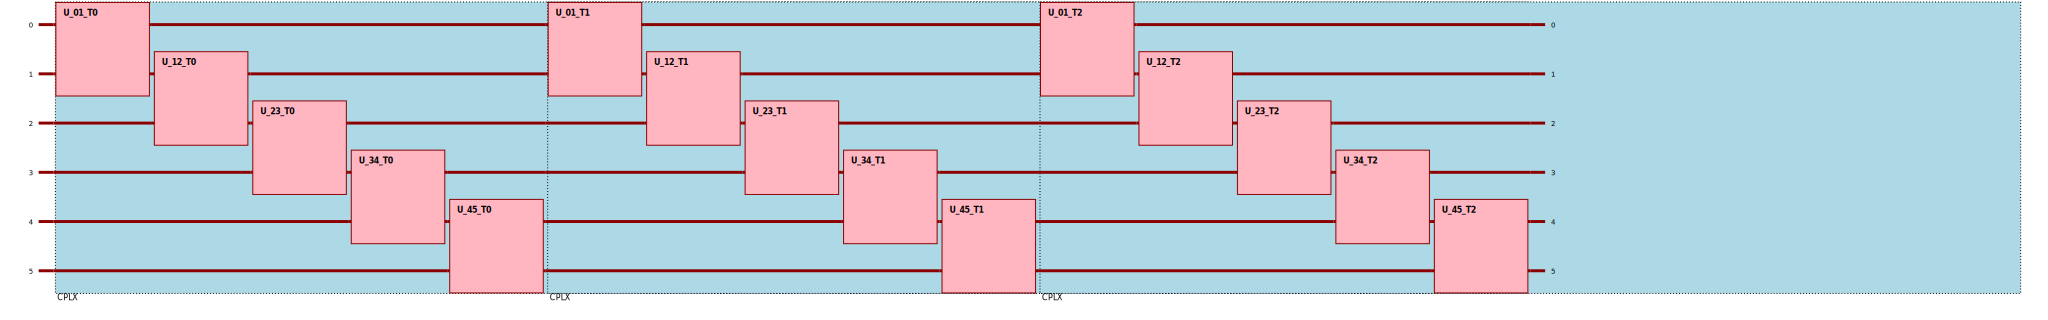

In [77]:
#Let's set the parameters of the circuit to the values in the matrix

parameter_matrix = generate_parameter_matrix(t, (n-1)*5)
print(parameter_matrix.shape)

def set_circuit_parameters(circuit, parameter_matrix):
    # Flatten the parameter matrix to match the list of parameters
    flattened_params = parameter_matrix.flatten() # [[1,2], [3,4]] -> [1,2,3,4]
    # Get the parameters from the circuit
    params = circuit.get_parameters()

    # Assert that the lengths match
    assert len(params) == len(flattened_params), f"The number of parameters {len(params)} in the circuit does not match the size of the matrix {len(flattened_params)}."

    # Set the values of the parameters
    for param, value in zip(params, flattened_params):
        param.set_value(value)

set_circuit_parameters(circuit, parameter_matrix)
print(circuit.get_parameters())
pcvl.pdisplay(circuit, recursive=True)

# Get the expectation values

In [79]:
backend = pcvl.BackendFactory.get_backend("SLOS")
backend.set_circuit(circuit)
backend.set_input_state(pcvl.BasicState([1]*6))
backend.
print(backend.prob_amplitude(pcvl.BasicState([2]*6)))  #note that it's the amplitude !
print(backend.prob_amplitude(pcvl.BasicState([0]*6)))
print(backend.probability(pcvl.BasicState([2]*6)))

0j
0j
0.0
